In [1]:
import pandas as pd
from sklearn.decomposition._pca import PCA
import numpy as np
from factor_analyzer import FactorAnalyzer
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

### Averaging, PCA and EFA simulations

In [2]:
factors = pd.read_csv('factors.csv')
variables = factors
variables

,VSQ(z),Total Chi(z),Aura(z),Headache Duration(z),Headache Intensity(z),Headache Frequency (z),Discomfort index (z)
0,-0.059382,0.222153,0.482065,-0.272205,-0.201676,-0.022904,-0.326605
1,-0.181270,-0.954435,0.482065,-0.332553,1.040226,-0.604863,0.414816
2,-0.790714,-0.366141,-0.657361,-0.493489,-0.615644,-0.645465,-0.474887
3,0.915728,-0.259178,2.191204,-0.433938,1.454194,0.626726,1.675228
4,0.671950,-0.125475,-0.657361,2.383107,1.868161,-0.347718,-0.549031
5,-1.156380,-1.328803,-0.657361,-0.493489,-1.857547,-0.672533,0.637239
6,0.671950,-1.034657,-0.657361,-0.453249,-0.615644,-0.645465,-0.771456
7,2.622169,0.034969,-0.657361,-0.392901,1.040226,0.301911,1.378657
8,0.184396,-0.499844,-0.657361,-0.151509,-1.029612,-0.483058,-0.919739
9,-1.400157,-0.687028,-0.657361,-0.453249,0.212291,-0.618397,-0.845598


In [3]:
factors.var()

VSQ(z)                    1.0
Total Chi(z)              1.0
Aura(z)                   1.0
Headache Duration(z)      1.0
Headache Intensity(z)     1.0
Headache Frequency (z)    1.0
Discomfort index (z)      1.0
dtype: float64

Bootstrapping

In [4]:
pca = PCA(n_components=3)
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
num_bootstrap_sample = 50000

loadings, components = [], []
flat_avg_obs, pca_obs, efa_obs = np.zeros((num_bootstrap_sample, 39, 3)), np.zeros((num_bootstrap_sample, 39, 3)), np.zeros((num_bootstrap_sample, 39, 3))
for i in tqdm(range(num_bootstrap_sample)):
    # get my bootstrapped sample
    sample = variables.sample(n=len(variables), replace=True)
    sample = sample - sample.mean()

    # firstly run PCA
    pca_data = pca.fit_transform(sample)
    components.append(pca.components_)
    
    pca_obs[i, :, 0] = pca_data[:, 0]
    pca_obs[i, :, 1] = pca_data[:, 1]
    pca_obs[i, :, 2] = pca_data[:, 2]
    
    # generata FA results
    fa.fit(sample)
    loadings.append(fa.loadings_)
    scores = fa.transform(sample)
    
    efa_obs[i, :, 0] = scores[:, 0]
    efa_obs[i, :, 1] = scores[:, 1]
    efa_obs[i, :, 2] = scores[:, 2]

    # averaging
    flat_avg_obs[i, :, 0] = sample[['VSQ(z)', 'Total Chi(z)', 'Aura(z)']].mean(axis=1)
    flat_avg_obs[i, :, 1] = sample[['Headache Duration(z)', 'Headache Frequency (z)', 'Headache Intensity(z)']].mean(axis=1)
    flat_avg_obs[i, :, 2] = sample['Discomfort index (z)']

100%|██████████| 50000/50000 [08:06<00:00, 102.84it/s]


### Data Analysis

Investigating appropriate components/factors and assigning them properly

In [5]:
# average loadings of PCA
data = pd.DataFrame(np.mean(components, axis=0).T, index=variables.columns, columns=['PC1 (Headache)', 'PC2 (Visual Stress)', 'PC3 (Discomfort)'])
data

,PC1 (Headache),PC2 (Visual Stress),PC3 (Discomfort)
VSQ(z),0.258103,-0.043213,0.140231
Total Chi(z),0.381755,-0.011741,-0.048846
Aura(z),0.360323,-0.053762,-0.034060
Headache Duration(z),0.085506,0.374504,0.124589
Headache Intensity(z),0.356747,0.240318,0.013612
Headache Frequency (z),0.379404,0.254151,0.003180
Discomfort index (z),0.095116,-0.049081,0.202438


In [9]:
# average loadings of PCA in original data structure 40x7. Calculate sum of variances of each column 7 numbers add them together. 
data = pd.DataFrame(np.mean(loadings, axis=0), index=variables.columns, columns=['F1 (Visaul Stress)', 'F2 (Headache)', 'F3 (Discomfort)'])
data

,F1 (Visaul Stress),F2 (Headache),F3 (Discomfort)
VSQ(z),0.325902,0.169575,0.242811
Total Chi(z),0.674701,0.216678,0.078488
Aura(z),0.625918,0.223026,0.196831
Headache Duration(z),-0.037760,0.314926,0.076749
Headache Intensity(z),0.444864,0.385853,0.135796
Headache Frequency (z),0.514690,0.408604,0.116585
Discomfort index (z),0.068750,0.148206,0.413319


In [7]:
data.sum()

F1 (Visaul Stress)    2.617065
F2 (Headache)         1.866868
F3 (Discomfort)       1.260580
dtype: float64

Calculate covariance matricies and traces for 1,2,3

In [8]:
data_to_present = []

# avg
avg1 = flat_avg_obs[:, :, 0].T
covariance_matrix = np.round(np.cov(avg1),2)
avg_trace_1 = round(np.round(np.trace(covariance_matrix),2)/avg1.shape[0],2)
data_to_present.append([avg_trace_1, 1, 'flat_avg'])

avg2 = flat_avg_obs[:, :, 1].T
covariance_matrix = np.round(np.cov(avg2),2)
avg_trace_2 = round(np.round(np.trace(covariance_matrix),2)/avg2.shape[0],2)
data_to_present.append([avg_trace_2, 2, 'flat_avg'])

avg3 = flat_avg_obs[:, :, 2].T
covariance_matrix = np.round(np.cov(avg3),2)
avg_trace_3 = round(np.round(np.trace(covariance_matrix),2)/avg3.shape[0],2)
data_to_present.append([avg_trace_3, 3, 'flat_avg'])

# PCA
avg1 = pca_obs[:, :, 0].T
covariance_matrix = np.round(np.cov(avg1),2)
avg_trace_1 = round(np.round(np.trace(covariance_matrix),2)/avg1.shape[0],2)
data_to_present.append([avg_trace_1, 1, 'pca'])

avg2 = pca_obs[:, :, 1].T
covariance_matrix = np.round(np.cov(avg2),2)
avg_trace_2 = round(np.round(np.trace(covariance_matrix),2)/avg2.shape[0],2)
data_to_present.append([avg_trace_2, 2, 'pca'])

avg3 = pca_obs[:, :, 2].T
covariance_matrix = np.round(np.cov(avg3),2)
avg_trace_3 = round(np.round(np.trace(covariance_matrix),2)/avg3.shape[0],2)
data_to_present.append([avg_trace_3, 3, 'pca'])


# EFA
avg1 = efa_obs[:, :, 0].T
covariance_matrix = np.round(np.cov(avg1),2)
avg_trace_1 = round(np.round(np.trace(covariance_matrix),2)/avg1.shape[0],2)
data_to_present.append([avg_trace_1, 1, 'efa'])

avg2 = efa_obs[:, :, 1].T
covariance_matrix = np.round(np.cov(avg2),2)
avg_trace_2 = round(np.round(np.trace(covariance_matrix),2)/avg2.shape[0],2)
data_to_present.append([avg_trace_2, 2, 'efa'])

avg3 = efa_obs[:, :, 2].T
covariance_matrix = np.round(np.cov(avg3),2)
avg_trace_3 = round(np.round(np.trace(covariance_matrix),2)/avg3.shape[0],2)
data_to_present.append([avg_trace_3, 3, 'efa'])

data_to_present = pd.DataFrame(data_to_present, columns=['result', 'value', 'type'])
pivot_df = data_to_present.pivot_table(index='type', columns='value', values='result', aggfunc='first')
pivot_df

value,1,2,3
type,,,
efa,0.92,0.91,0.88
flat_avg,0.60,0.55,0.95
pca,2.62,1.57,0.95


Look at covariance matricies of the first principal component, EFA and averages.

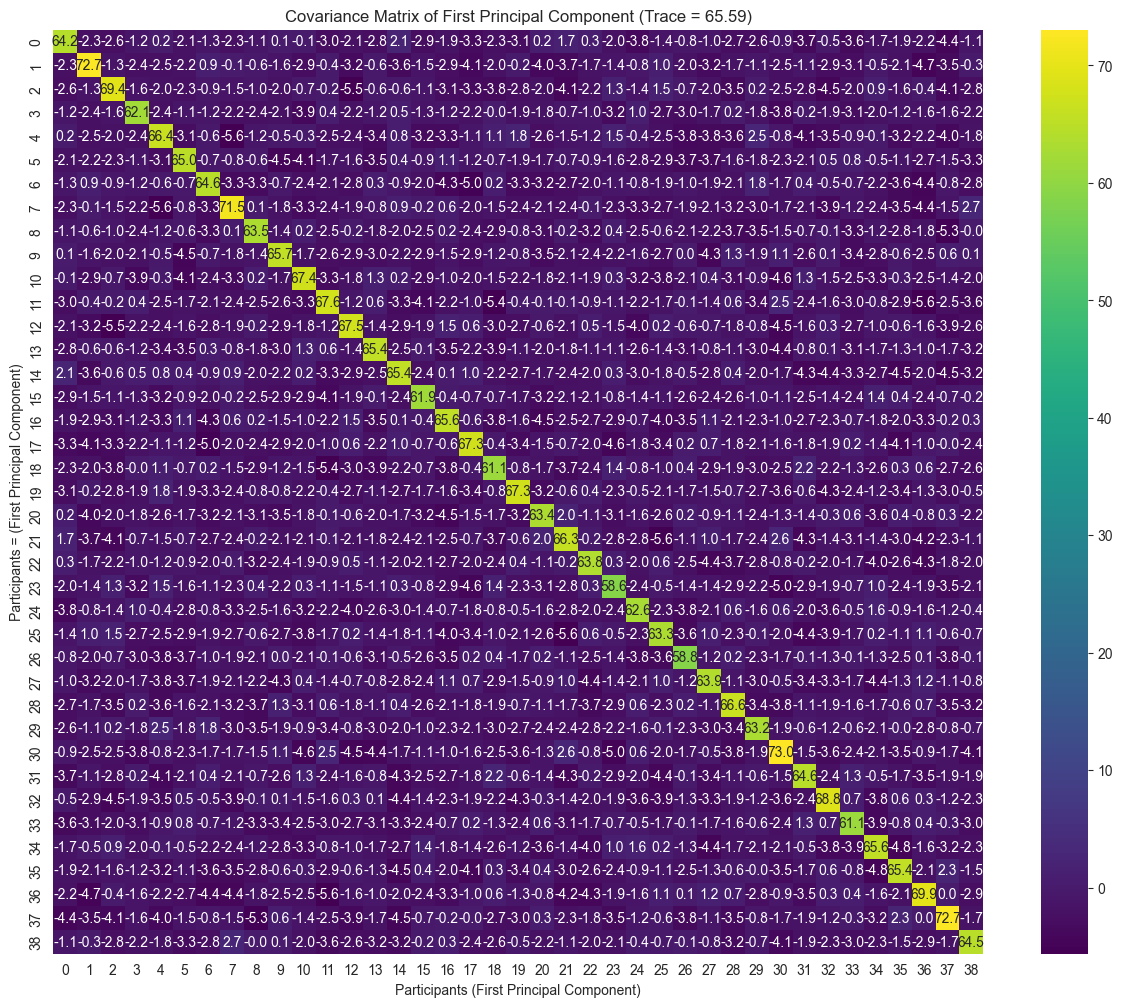

In [9]:
pca_obs_reshaped = np.array(pca_obs).T
covariance_matrix = np.round(np.cov(pca_obs_reshaped),2)
trace = round(np.round(np.trace(covariance_matrix),2)/pca_obs_reshaped.shape[0],2)
plt.figure(figsize=(15, 12))
sns.heatmap(covariance_matrix, cmap='viridis', annot=True, fmt=".1f", cbar=True)
plt.title(f'Covariance Matrix of First Principal Component (Trace = {trace})')
plt.xlabel('Participants (First Principal Component)')
plt.ylabel('Participants = (First Principal Component)')
plt.show()

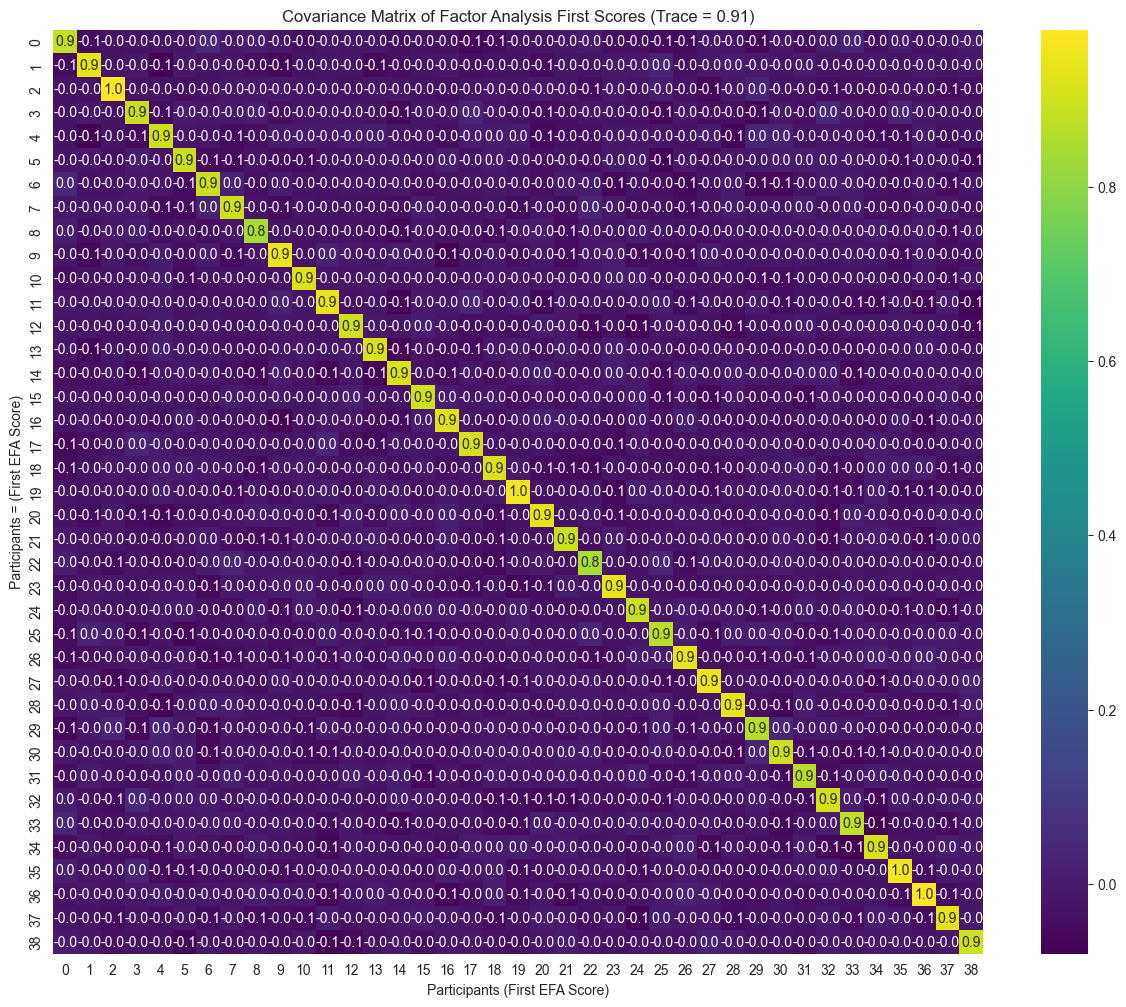

In [10]:
efa_obs = np.array(efa_obs).T
covariance_matrix = np.round(np.cov(efa_obs),2)
trace = round(np.round(np.trace(covariance_matrix),2)/efa_obs.shape[0],2)
plt.figure(figsize=(15, 12))
sns.heatmap(covariance_matrix, cmap='viridis', annot=True, fmt=".1f", cbar=True)
plt.title(f'Covariance Matrix of Factor Analysis First Scores (Trace = {trace})')
plt.xlabel('Participants (First EFA Score)')
plt.ylabel('Participants = (First EFA Score)')
plt.show()

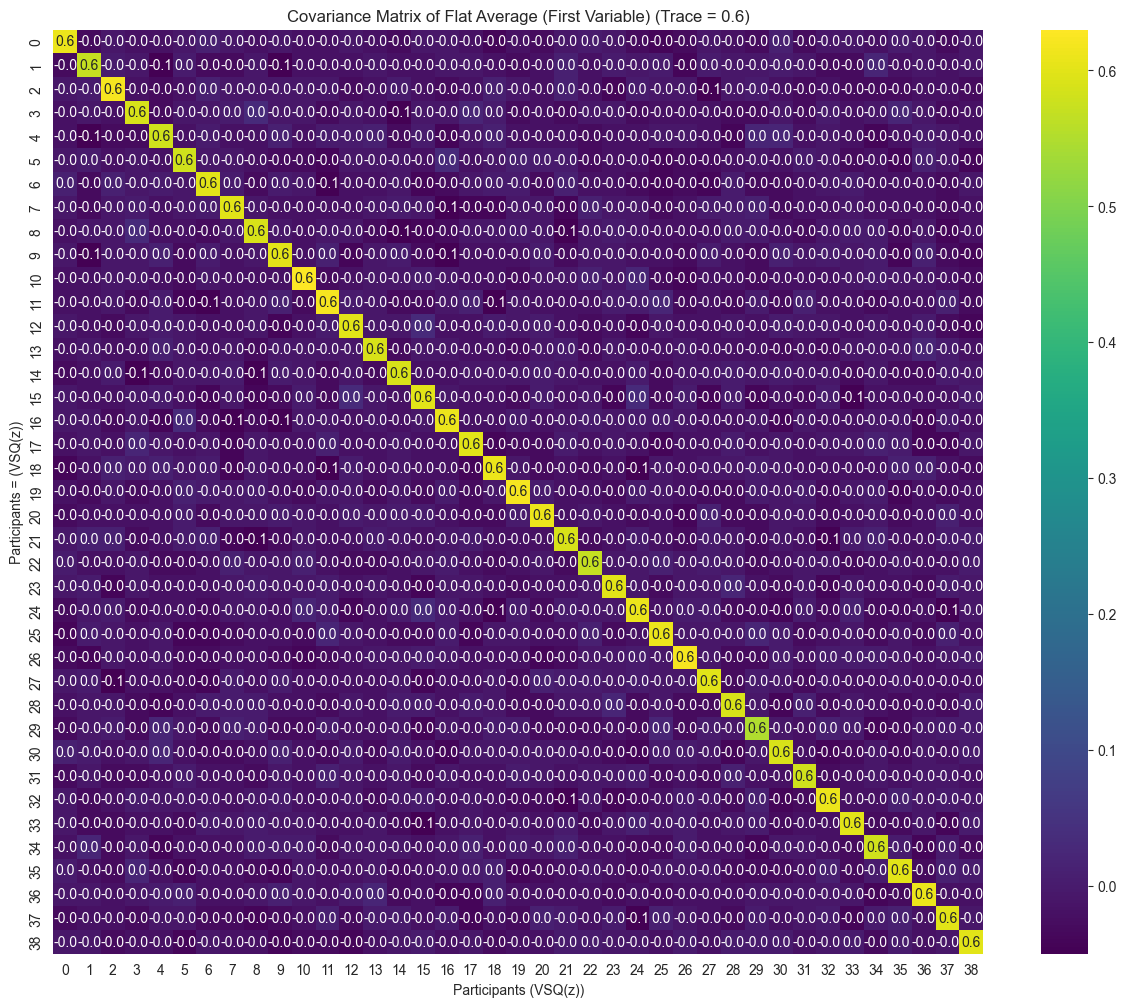

In [11]:
flat_avg_obs = np.array(flat_avg_obs).T
covariance_matrix = np.round(np.cov(flat_avg_obs),2)
trace = round(np.round(np.trace(covariance_matrix),2)/flat_avg_obs.shape[0],2)
plt.figure(figsize=(15, 12))
sns.heatmap(covariance_matrix, cmap='viridis', annot=True, fmt=".1f", cbar=True)
plt.title(f'Covariance Matrix of Flat Average (First Variable) (Trace = {trace})')
plt.xlabel('Participants (VSQ(z))')
plt.ylabel('Participants = (VSQ(z))')
plt.show()

PCA Component Matricies

In [110]:
import plotly.graph_objects as go

data = fa_results

# Unpack the data
x = [item[0] for item in data]
y = [item[1] for item in data]
z = [item[2] for item in data]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=6,
        color=z,                # set color to an arry/list of desired values
        colorscale='Viridis',    # choose a colorscale
        opacity=0.8
    )
)])

# Set the size of the plot
fig.update_layout(
    autosize=False,
    width=1600,   # Set the width of the plot
    height=1200,  # Set the height of the plot
    scene = dict(
        xaxis_title='1',
        yaxis_title='2',
        zaxis_title='3'
    ),
    title='50,000 Bootstrapped Iterations'
)


# Show the plot
fig.show()


### Appendix

Old bootstrapping method

In [ ]:
pca = PCA(n_components=3)
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
num_bootstrap_sample = 50

fa_results, pca_results, mean_results, loadings, components = [], [], [], [], []
for i in range(num_bootstrap_sample):
    # get my bootstrapped sample
    sample = variables.sample(n=len(variables), replace=True)
    sample = sample - sample.mean()

    # firstly run PCA
    pca_data = pca.fit_transform(sample)
    pca_results.append(np.mean(pca_data, axis=0).tolist())
    components.append(pca.components_)  

    # generata FA results
    fa.fit(sample)
    loadings.append(fa.loadings_)
    scores = fa.transform(sample)
    fa_results.append(np.mean(scores, axis=0).tolist())

    # generate mean results
    if num_var == 7:
        discomfort = sample['Discomfort index (z)'].mean()
        visual_stress = sample[['VSQ(z)', 'Total Chi(z)', 'Aura(z)']].mean().mean()
        headache = sample[['Headache Duration', 'Headache Intensity(z)', 'Headache Frequency (z)']].mean().mean()
        mean_results.append([visual_stress, headache, discomfort])
    else:
        mean_results.append(sample.mean().tolist())